In [1]:
from eda_import import *

This example shows why a treatment that all cleavage sites could be mapped to all stop codons isn't justified even without mention of CSs being upstream of stop codons.

In [2]:
L1, L2 = 1, 2
L3 = 3
L4 = 4

In [3]:
t1 = list(itertools.combinations([L1, L3], 1)) + list(itertools.combinations([L1, L3], 2))
t1

[(1,), (3,), (1, 3)]

In [4]:
t2 = list(itertools.combinations([L2, L4], 1)) + list(itertools.combinations([L2, L4], 2))
t2 

[(2,), (4,), (2, 4)]

In [5]:
poss = [_ for _ in list(itertools.product(t1, t2)) if _
 not in [((1,), (3,)), ((2,), (4,))]]
poss

[((1,), (2,)),
 ((1,), (4,)),
 ((1,), (2, 4)),
 ((3,), (2,)),
 ((3,), (4,)),
 ((3,), (2, 4)),
 ((1, 3), (2,)),
 ((1, 3), (4,)),
 ((1, 3), (2, 4))]

In [6]:
# poss = [_ for _ in list(itertools.product(t1, t2))]
[_ for _ in list(itertools.product(t1, t2))]

[((1,), (2,)),
 ((1,), (4,)),
 ((1,), (2, 4)),
 ((3,), (2,)),
 ((3,), (4,)),
 ((3,), (2, 4)),
 ((1, 3), (2,)),
 ((1, 3), (4,)),
 ((1, 3), (2, 4))]

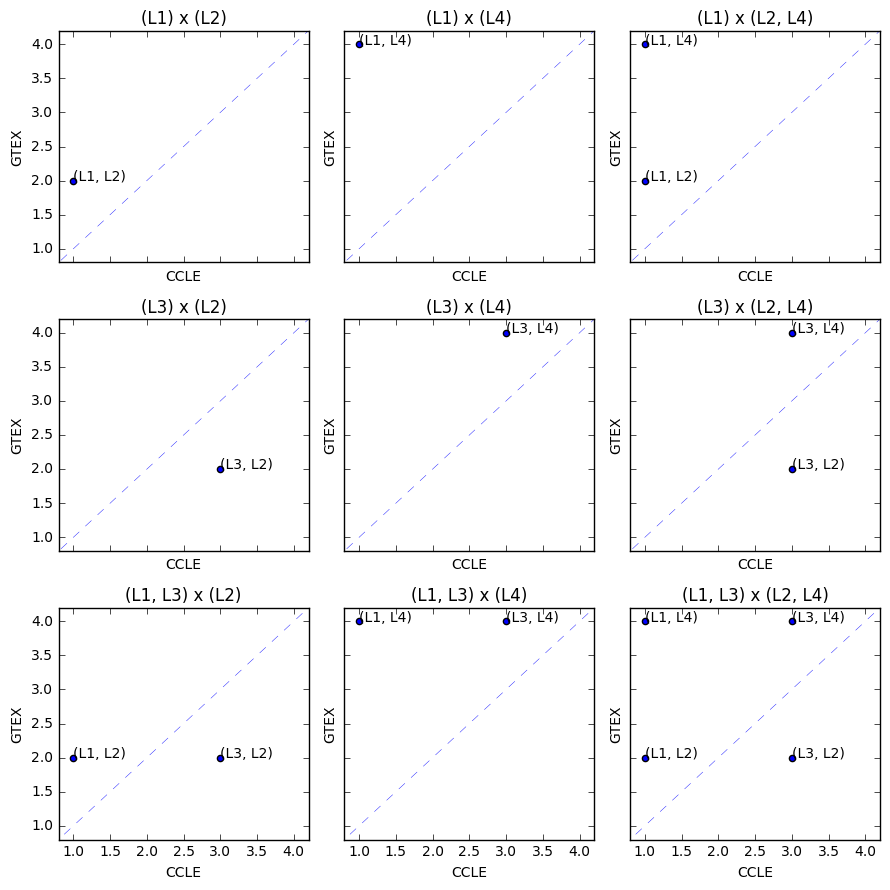

In [7]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9, 9))
axes = axes.ravel()
for k in range(len(poss)):
    ax = axes[k]
    dots = list(itertools.product(*poss[k]))
    
    p0 = ', '.join(['L' + str(_) for _ in poss[k][0]])
    p1 = ', '.join(['L' + str(_) for _ in poss[k][1]])
    ax.set_title('({0}) x ({1})'.format(p0, p1))         
                 
    xs = [_[0] for _ in dots]
    ys = [_[1] for _ in dots]
    ax.scatter(xs, ys)
    ax.set_xlabel('CCLE')
    ax.set_ylabel('GTEX')
    
    ax.plot([0, 5], [0, 5], '--', lw=0.3)
    for d in dots:
        ax.text(d[0], d[1], '(L{0}, L{1})'.format(d[0], d[1]))
    ax.set_xlim([0.8, 4.2])
    ax.set_ylim([0.8, 4.2])
plt.tight_layout()


**Note:** 

>all the subplots are possible, and they can lead to very different conclusions in terms of either lengthening or shortening results. There is probably some preference to one over the other, treating them with the same probability is kind of contradictory to what we are trying to study to me.

Ref: https://www.bcgsc.ca/jira/browse/BTL-775